In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("/content/world_country_and_usa_states_latitude_and_longitude_values.csv")

print(df.head())


  country_code   latitude  longitude               country usa_state_code  \
0           AD  42.546245   1.601554               Andorra             AK   
1           AE  23.424076  53.847818  United Arab Emirates             AL   
2           AF  33.939110  67.709953           Afghanistan             AR   
3           AG  17.060816 -61.796428   Antigua and Barbuda             AZ   
4           AI  18.220554 -63.068615              Anguilla             CA   

   usa_state_latitude  usa_state_longitude   usa_state  
0           63.588753          -154.493062      Alaska  
1           32.318231           -86.902298     Alabama  
2           35.201050           -91.831833    Arkansas  
3           34.048928          -111.093731     Arizona  
4           36.778261          -119.417932  California  


In [9]:
df = df.dropna(subset=["latitude", "longitude"])

In [10]:
coords = df[["latitude", "longitude"]]

In [11]:
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

In [12]:
dbscan = DBSCAN(eps=0.3, min_samples=3)
labels = dbscan.fit_predict(coords_scaled)

In [13]:
df["cluster"] = labels

In [14]:
print(df.head())
print("Cluster unik:", set(labels))

  country_code   latitude  longitude               country usa_state_code  \
0           AD  42.546245   1.601554               Andorra             AK   
1           AE  23.424076  53.847818  United Arab Emirates             AL   
2           AF  33.939110  67.709953           Afghanistan             AR   
3           AG  17.060816 -61.796428   Antigua and Barbuda             AZ   
4           AI  18.220554 -63.068615              Anguilla             CA   

   usa_state_latitude  usa_state_longitude   usa_state  cluster  
0           63.588753          -154.493062      Alaska        0  
1           32.318231           -86.902298     Alabama        0  
2           35.201050           -91.831833    Arkansas        0  
3           34.048928          -111.093731     Arizona        1  
4           36.778261          -119.417932  California        1  
Cluster unik: {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(-1)}


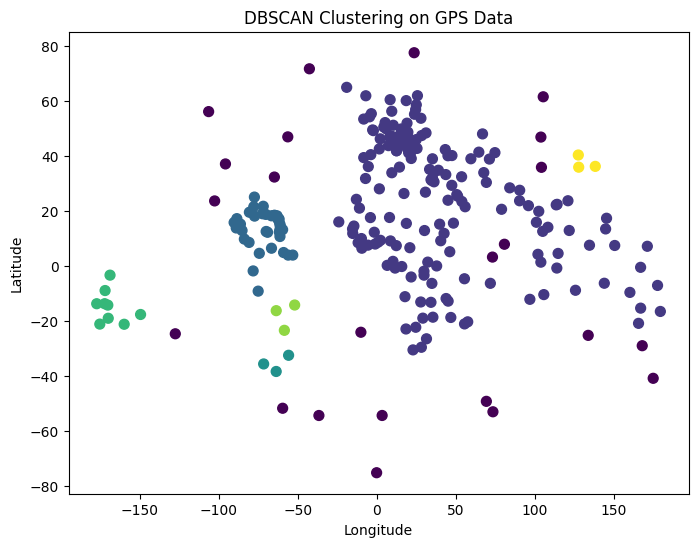

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(df["longitude"], df["latitude"], c=df["cluster"], s=50)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("DBSCAN Clustering on GPS Data")
plt.show()